In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None # disable warnings
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

# Practical Motivation

Everyone's raving to the newest hit single by the hottest artist. Shopping malls and eateries only play the most trending and most hip songs. Don't we all get tired of those songs after a while? We want to know what makes a song popular, and beyond that a chart topper - and then proceed to flip all of that upside down. We want to uncover the overlooked, misunderstood and underrated, songs that deserve to be played, down supermarket aisles and up on-air. Here's to the undervalued songs!

# Sample Collection &amp; Data Preparation

We are using two datasets: 1) Songs that have been in the global weekly 200 (4087 songs) and 2) A large dataset of songs with audio features and popularity scores (176774 songs)

In [3]:
songHitData = pd.read_csv('Dataset/global_weekly_top_200.csv')
songPopularityData = pd.read_csv('Dataset/SpotifyFeatures.csv')

print(len(songHitData))
print(len(songPopularityData))

42200
232725


In [ ]:
topDF = pd.DataFrame(data = songHitData.drop_duplicates(subset=["track_id"], inplace=False))
topDF

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,filedate,start_week,end_week,track_id
0,0,1,Starboy,The Weeknd,25286465,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,5aAx2yezTd8zXrkmtKl66Z
1,1,2,Closer,The Chainsmokers,22047697,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,7BKLCZ1jbUBVqRi2FVlTVw
2,2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,19794482,https://open.spotify.com/track/5knuzwU65gJK7IF...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,5knuzwU65gJK7IF5yJsuaW
3,3,4,Let Me Love You,DJ Snake,17965723,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,4pdPtRcBmOSQDlJ3Fk945m
4,4,5,Don't Wanna Know,Maroon 5,16966668,https://open.spotify.com/track/5MFzQMkrl1FOOng...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,5MFzQMkrl1FOOng9tq6R9r
...,...,...,...,...,...,...,...,...,...,...
42165,42165,166,Can You Feel My Heart,Bring Me The Horizon,5380466,https://open.spotify.com/track/0WSa1sucoNRcEeU...,2021-01-15--2021-01-22,2021-01-15,2021-01-22,0WSa1sucoNRcEeULlZVQXj
42171,42171,172,Astronaut In The Ocean,Masked Wolf,5295877,https://open.spotify.com/track/3Ofmpyhv5UAQ70m...,2021-01-15--2021-01-22,2021-01-15,2021-01-22,3Ofmpyhv5UAQ70mENzB277
42176,42176,177,Don't Play,Anne-Marie,5119828,https://open.spotify.com/track/4I5bvu2KDsrCg0E...,2021-01-15--2021-01-22,2021-01-15,2021-01-22,4I5bvu2KDsrCg0EWHIcvul
42183,42183,184,Hasta Abajo,Kevin Roldan,4994621,https://open.spotify.com/track/4PEfJZpVjdclfzZ...,2021-01-15--2021-01-22,2021-01-15,2021-01-22,4PEfJZpVjdclfzZ9XO8uDw


In [ ]:
songsDF = pd.DataFrame(data = songPopularityData.drop_duplicates(subset=["track_id"], inplace=False))
songsDF

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


In [ ]:
# merge the two datasets
topDF = topDF[["track_id", "Streams"]]
hitDF = pd.merge(topDF,songsDF, on="track_id")
hitDF

,track_id,Streams,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,7BKLCZ1jbUBVqRi2FVlTVw,22047697,Dance,The Chainsmokers,Closer,86,0.4140,0.748,244960,0.524,0.00000,G#,0.1110,-5.599,Major,0.0338,95.010,4/4,0.661
1,5knuzwU65gJK7IF5yJsuaW,19794482,Dance,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),81,0.4060,0.720,251088,0.763,0.00000,A,0.1800,-4.068,Minor,0.0523,101.965,4/4,0.742
2,6fujklziTHa8uoM5OQSfIo,16831609,Hip-Hop,Rae Sremmurd,Black Beatles,78,0.1420,0.794,291893,0.632,0.00000,C,0.1280,-6.163,Major,0.0649,145.926,4/4,0.355
3,343YBumqHu19cGoGARUTsd,16629189,Hip-Hop,Drake,Fake Love,76,0.1080,0.927,210937,0.488,0.00000,A,0.1960,-9.433,Minor,0.4200,133.987,4/4,0.605
4,6b8Be6ljOzmkOmFslEb23P,16023066,Dance,Bruno Mars,24K Magic,80,0.0340,0.818,225983,0.803,0.00000,C#,0.1530,-4.282,Major,0.0797,106.970,4/4,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,4rHZZAmHpZrA3iH5zx8frV,4988571,Dance,Justin Timberlake,Mirrors,77,0.2340,0.574,484147,0.512,0.00000,F,0.0946,-6.664,Minor,0.0503,76.899,4/4,0.512
1252,7uoFMmxln0GPXQ0AcCBXRq,10233522,Pop,Sia,Snowman,56,0.4830,0.716,165907,0.512,0.00000,C#,0.0928,-6.257,Major,0.0331,104.957,3/4,0.326
1253,1N1ZpYUJc9fwrqk53FGgWv,9474711,Dance,Sia,Santa's Coming For Us,57,0.0205,0.669,206533,0.854,0.00000,C#,0.0470,-4.486,Major,0.0999,93.057,4/4,0.707
1254,0Ie5uiv54KgCr7P4sYDTHl,8160534,Movie,Idina Menzel,Baby It's Cold Outside (duet with Michael Bublé),56,0.6470,0.553,166147,0.476,0.00000,C,0.2810,-8.869,Major,0.0649,113.401,3/4,0.558


We can hence identify 1256 songs that were in the weekly top 200 at some point, out of our huge dataset of 176774 songs. We shall call these songs our Hit Songs.

# Exploratory Analysis of Hit Songs

### What is the distribution of streams?

In [ ]:
streams = pd.DataFrame(data=hitDF["Streams"])
streams.describe()

,Streams
count,1.256000e+03
mean,7.909919e+06
std,6.560553e+06
min,2.580512e+06
25%,4.292898e+06
50%,5.371360e+06
75%,8.947454e+06
max,7.146787e+07


<AxesSubplot:>

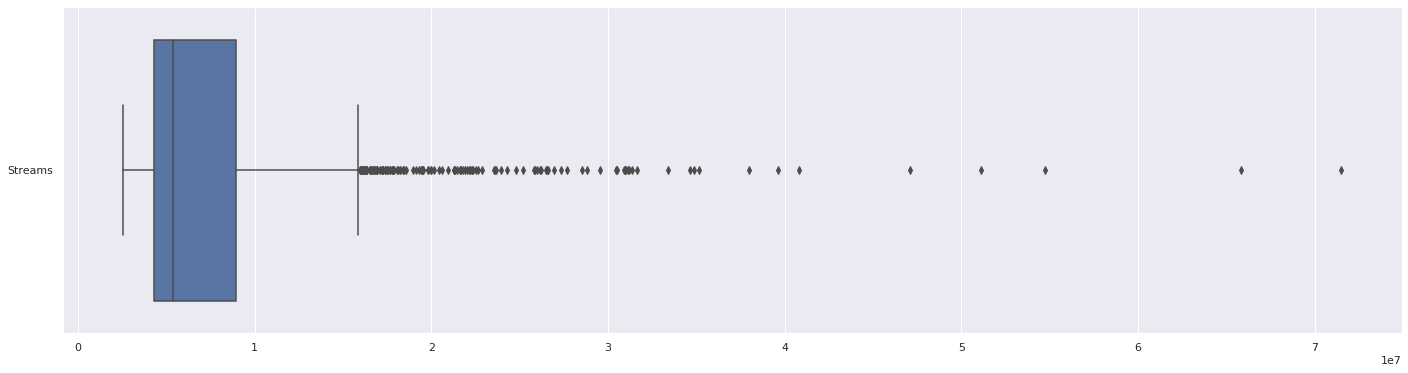

In [ ]:
# boxplot
f = plt.figure(figsize=(24, 6))
sb.boxplot(data = streams, orient="h")

<AxesSubplot:ylabel='Count'>

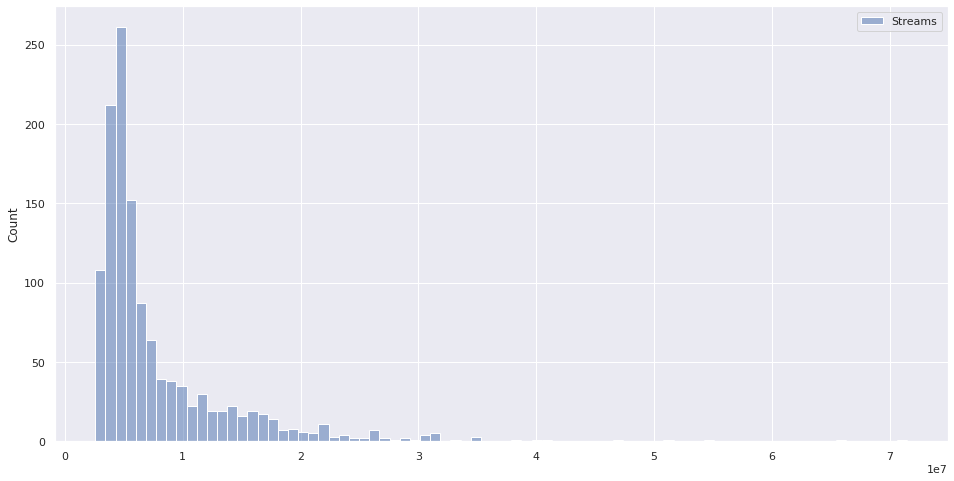

In [ ]:
# histogram
f = plt.figure(figsize=(16, 8))
sb.histplot(data=streams)

It seems like the number of streams tends to have many outliers beyond q3 + 1.5IQR, which explains why the mean is much higher than the median. This means that some songs individually are streamed much more than other songs, even within the top songs.

### What is the distribution of popularity scores?

In [ ]:
popularity = pd.DataFrame(data=hitDF["popularity"])
popularity.describe()

,popularity
count,1256.000000
mean,75.386146
std,9.548856
min,0.000000
25%,69.000000
50%,76.000000
75%,82.000000
max,100.000000


<AxesSubplot:>

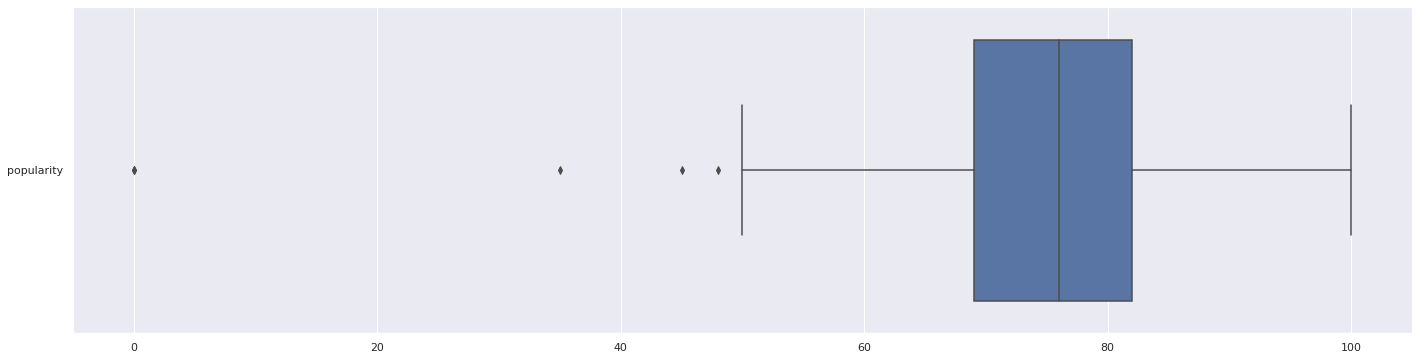

In [ ]:
f = plt.figure(figsize=(24, 6))
sb.boxplot(data=popularity, orient="h")

<AxesSubplot:ylabel='Count'>

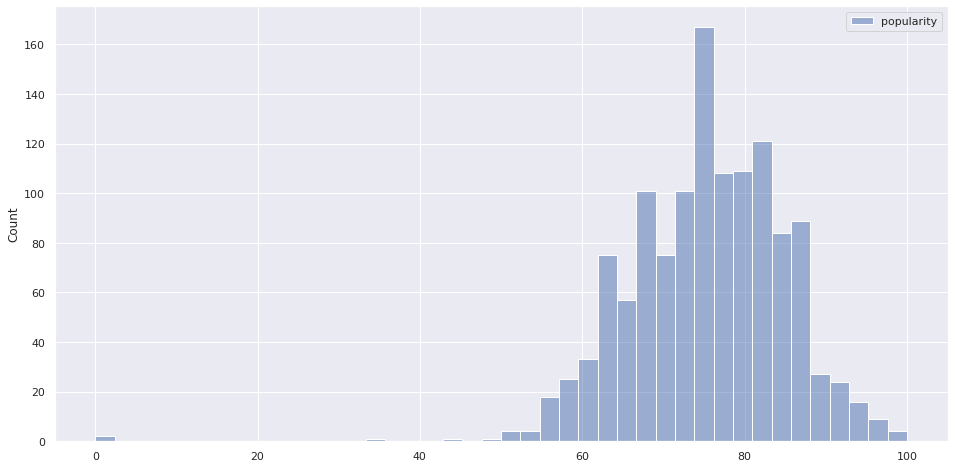

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data=popularity)

<AxesSubplot:>

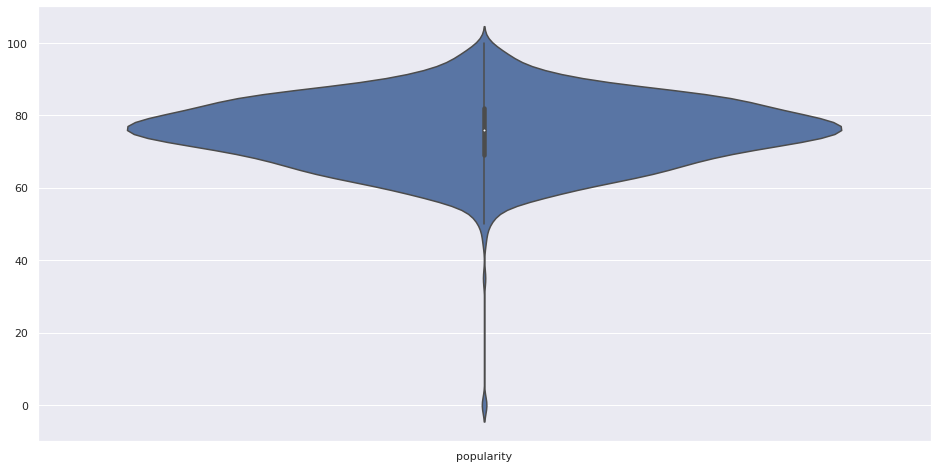

In [ ]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data=popularity)

A stingray! Seems like a majority of hit songs have very high popularity scores, as expected. The distribution is symmetrical, with the mean being very close to the median (75-76), resembling a normal distribution. With the exception of some outliers that have very low popularity scores, it is safe to say that hit songs are also generally popular songs.  

### Which artist had the most hits?

In [ ]:
# bar chart by artist
artistDF = pd.DataFrame()
artistDF['artist_name'] = hitDF['artist_name'].astype('category')
artistCount = artistDF.groupby(['artist_name']).size().to_frame(name = 'count').reset_index()

artistCount.sort_values(by=["count"], ascending=False, inplace=True)
top25 = artistCount[:25]
top25


,artist_name,count
356,XXXTENTACION,36
87,Drake,34
23,Ariana Grande,27
201,Logic,25
195,Lil Wayne,23
272,Post Malone,23
230,Migos,22
92,Ed Sheeran,21
28,BTS,21
338,Travis Scott,18


<AxesSubplot:xlabel='artist_name'>

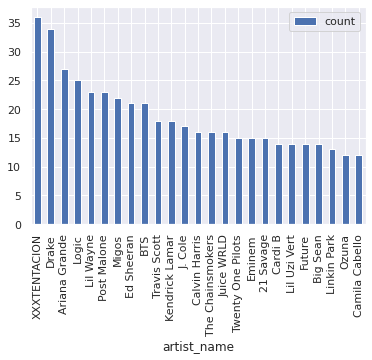

In [ ]:
top25.plot.bar(x="artist_name", y="count", rot=90)

It seems like XXXTENTACION has dropped a lot of hits throughout his short career. Died too soon. RIP

What is the distribution of genres?

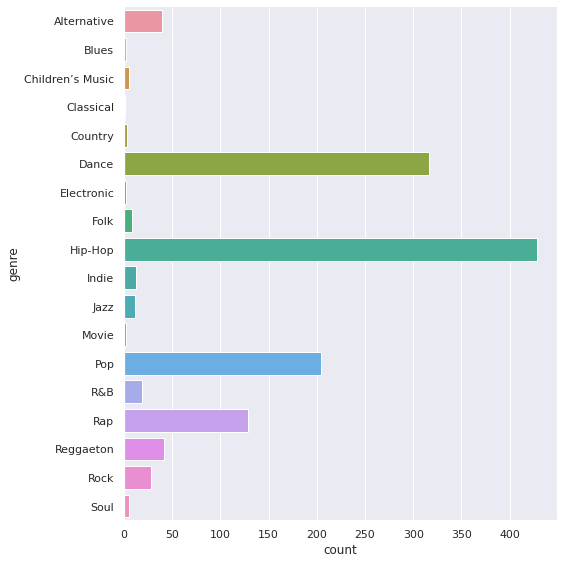

In [ ]:
# bar chart by genre
genreDF = pd.DataFrame()
genreDF['genre'] = hitDF['genre'].astype('category')
sb.catplot(y = 'genre', data = genreDF, kind = "count", height = 8)

In [ ]:
genreDF.groupby(['genre']).size()

genre
Alternative          39
Blues                 2
Children’s Music      5
Classical             1
Country               3
Dance               316
Electronic            2
Folk                  8
Hip-Hop             428
Indie                12
Jazz                 11
Movie                 2
Pop                 204
R&B                  19
Rap                 129
Reggaeton            42
Rock                 28
Soul                  5
dtype: int64

# Further Data Preparation

## Forming our Hit vs Non-Hit Songs Dataset

We now remove the 1256 Hit Songs from our songsDF. We then select another 1256 songs, by the same genre distribution, assuming they are all non-hits. 

In [ ]:
# removing 1256 hits -> 175,518 songs
songsDF = pd.concat([hitDF, songsDF])
songsDF.drop_duplicates(subset=["track_id"],keep=False, inplace=True)
songsDF.drop(columns="Streams", inplace=True)
songsDF


,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,Soul,John Legend,Quickly (feat. Brandy),39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,2gGqKJWfWbToha2YmDxnnj,Soul,Belly,P.O.P.,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,2iZf3EUedz9MPqbAvXdpdA,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,1qWZdkBl4UVPj9lK6HuuFM,Soul,Jr Thomas & The Volcanos,Burning Fire,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


Note: This is based on the assumption that a song is strictly only considered a hit song if it appears in our global weekly top 200 dataset. Of course, there may be exceptions, such as hit songs that are not considered because they entered the weekly top 200 at a time outside what the topDF dataset has captured. These exceptions will not be considered in the interest of our projects' scope, but we do believe that these exceptions are among the minority, since only a small percentage of songs make the top 200 charts in the first place.

In [ ]:
# Alternative          39
# Blues                 2
# Children’s Music      5
# Classical             1
# Country               3
# Dance               316
# Electronic            2
# Folk                  8
# Hip-Hop             428
# Indie                12
# Jazz                 11
# Movie                 2
# Pop                 204
# R&B                  19
# Rap                 129
# Reggaeton            42
# Rock                 28
# Soul                  5

alt = songsDF[songsDF["genre"] == "Alternative"].sample(n=39)
blues = songsDF[songsDF["genre"] == "Blues"].sample(n=2)
child = songsDF[songsDF["genre"] == "Children's Music"].sample(n=5)
classical = songsDF[songsDF["genre"] == "Classical"].sample(n=1)
country = songsDF[songsDF["genre"] == "Country"].sample(n=3)
dance = songsDF[songsDF["genre"] == "Dance"].sample(n=316)
elec = songsDF[songsDF["genre"] == "Electronic"].sample(n=2)
folk = songsDF[songsDF["genre"] == "Folk"].sample(n=8)
hiphop = songsDF[songsDF["genre"] == "Hip-Hop"].sample(n=428)
indie = songsDF[songsDF["genre"] == "Indie"].sample(n=12)
jazz = songsDF[songsDF["genre"] == "Jazz"].sample(n=11)
movie = songsDF[songsDF["genre"] == "Movie"].sample(n=2)
pop = songsDF[songsDF["genre"] == "Pop"].sample(n=204)
rnb = songsDF[songsDF["genre"] == "R&B"].sample(n=19)
rap = songsDF[songsDF["genre"] == "Rap"].sample(n=129)
reg = songsDF[songsDF["genre"] == "Reggaeton"].sample(n=42)
rock = songsDF[songsDF["genre"] == "Rock"].sample(n=28)
soul = songsDF[songsDF["genre"] == "Soul"].sample(n=5)

nonHitDF = pd.concat([alt, blues, child, classical, country, dance, elec, folk, hiphop, indie, jazz, movie, pop, rnb, rap, reg, rock, soul])
nonHitDF

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
13576,1eB168FV8b7ORTiBQS1u81,Alternative,Baroness,Front Toward Enemy,41,0.000099,0.218,224587,0.988,0.024000,G,0.2370,-3.988,Major,0.1120,84.401,4/4,0.0821
9587,7LG5qAX1r73gafhxvzu28K,Alternative,311,Come Original,44,0.010500,0.654,222360,0.976,0.000008,B,0.1240,-5.632,Minor,0.0594,93.894,4/4,0.7800
3600,3pJfnBjO3kjudEchcPEDxS,Alternative,Caifanes,Afuera,68,0.209000,0.487,288600,0.553,0.000028,F#,0.0992,-11.197,Minor,0.0425,126.043,4/4,0.6990
5612,67fRHOlaYQQFG67D9DkdnW,Alternative,Gorillaz,"The Apprentice (feat. Rag'n'Bone Man, Zebra Ka...",52,0.182000,0.446,234933,0.648,0.000011,B,0.3480,-6.773,Minor,0.3000,86.021,4/4,0.6960
12553,4veAfJzDj9Ohj8nMD84x1g,Alternative,WESLEE,Gassed - Yung Bae Remix,42,0.090700,0.773,172269,0.829,0.000002,D#,0.0775,-4.709,Minor,0.1810,116.969,4/4,0.3230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192733,4EUlszQIxlPwiHJ6e6j6Gy,Soul,Stephanie Mills,Never Knew Love Like This Before,61,0.369000,0.732,325173,0.554,0.000001,B,0.0762,-13.553,Major,0.0336,114.045,4/4,0.7460
196839,6V5L99nGuMyJ1XlPCVNOcd,Soul,Slum Village,Climax (Girl Shit),43,0.373000,0.825,211893,0.526,0.000001,G#,0.2530,-5.346,Minor,0.2470,95.676,4/4,0.7560
197081,2PGI8tz7m6jttZcWfRxtc1,Soul,Erykah Badu,Incense,38,0.745000,0.576,206640,0.234,0.343000,G#,0.1200,-15.522,Minor,0.0293,88.529,4/4,0.3640
192626,70A7N2jqbXrZnZgjQKGJUs,Soul,JOBA,Sad Saturdays,55,0.625000,0.377,267040,0.152,0.000037,F,0.1670,-14.857,Major,0.0406,69.969,4/4,0.1180


In [ ]:
# check that hit songs and non hit songs do not overlap
check = pd.merge(nonHitDF,hitDF, on="track_id")
check

,track_id,genre_x,artist_name_x,track_name_x,popularity_x,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,...,energy_y,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,time_signature_y,valence_y


The non-hit songs are combined with the hit songs to form a dataset with equal number of hit songs and non-hit songs, called mainDF. A boolean column "hit" is added to keep track of whether a song was a hit or not. This will be the main dataset we will be using to train our models.

In [ ]:
# 2512 songs in mainDF

hitDF["hit"] = 1
nonHitDF["hit"] = 0
mainDF = pd.concat([hitDF,nonHitDF])
mainDF

,track_id,Streams,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,hit
0,7BKLCZ1jbUBVqRi2FVlTVw,22047697.0,Dance,The Chainsmokers,Closer,86,0.414,0.748,244960,0.524,0.000000,G#,0.1110,-5.599,Major,0.0338,95.010,4/4,0.661,1
1,5knuzwU65gJK7IF5yJsuaW,19794482.0,Dance,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),81,0.406,0.720,251088,0.763,0.000000,A,0.1800,-4.068,Minor,0.0523,101.965,4/4,0.742,1
2,6fujklziTHa8uoM5OQSfIo,16831609.0,Hip-Hop,Rae Sremmurd,Black Beatles,78,0.142,0.794,291893,0.632,0.000000,C,0.1280,-6.163,Major,0.0649,145.926,4/4,0.355,1
3,343YBumqHu19cGoGARUTsd,16629189.0,Hip-Hop,Drake,Fake Love,76,0.108,0.927,210937,0.488,0.000000,A,0.1960,-9.433,Minor,0.4200,133.987,4/4,0.605,1
4,6b8Be6ljOzmkOmFslEb23P,16023066.0,Dance,Bruno Mars,24K Magic,80,0.034,0.818,225983,0.803,0.000000,C#,0.1530,-4.282,Major,0.0797,106.970,4/4,0.632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192733,4EUlszQIxlPwiHJ6e6j6Gy,NaN,Soul,Stephanie Mills,Never Knew Love Like This Before,61,0.369,0.732,325173,0.554,0.000001,B,0.0762,-13.553,Major,0.0336,114.045,4/4,0.746,0
196839,6V5L99nGuMyJ1XlPCVNOcd,NaN,Soul,Slum Village,Climax (Girl Shit),43,0.373,0.825,211893,0.526,0.000001,G#,0.2530,-5.346,Minor,0.2470,95.676,4/4,0.756,0
197081,2PGI8tz7m6jttZcWfRxtc1,NaN,Soul,Erykah Badu,Incense,38,0.745,0.576,206640,0.234,0.343000,G#,0.1200,-15.522,Minor,0.0293,88.529,4/4,0.364,0
192626,70A7N2jqbXrZnZgjQKGJUs,NaN,Soul,JOBA,Sad Saturdays,55,0.625,0.377,267040,0.152,0.000037,F,0.1670,-14.857,Major,0.0406,69.969,4/4,0.118,0


We remove the non-hit songs selected from the songsDF, just like we did with the hit songs, to get the untrained_untested_songsDF. This DF contains data points that do not overlap with main DF at all. This will be the dataset we will apply our trained models on to do predictions. 

In [ ]:
#  remove 1256 non-hit songs from songsDF -> 174,262 songs
untrained_untested_songsDF = pd.concat([songsDF, nonHitDF]).drop_duplicates(subset=["track_id"], keep=False, inplace=False)
untrained_untested_songsDF.drop(columns="hit", inplace=True)
untrained_untested_songsDF

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,Soul,John Legend,Quickly (feat. Brandy),39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,2gGqKJWfWbToha2YmDxnnj,Soul,Belly,P.O.P.,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,2iZf3EUedz9MPqbAvXdpdA,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,1qWZdkBl4UVPj9lK6HuuFM,Soul,Jr Thomas & The Volcanos,Burning Fire,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


# Problem Formulation &amp; Machine Learning with Algorithm Optimisation

We formulate 3 different problems to perform pattern recognition among 3 different variables: 1. Popularity &amp; Hit Status, 2. Audio Features &amp; Hit Status, and 3. Audio Features &amp; Popularity

We then use machine learning for each of the above problems to predict songs that fall into 3 categories: The Overlooked, The Ones That Got Away and The Criminally Underrated. We try different models and algorithms and compare their performance.

# Problem 1: Popularity VS Hit Status

## Do popular songs necessarily become hits? 

We first look at the relationship between popularity scores and whether a song was a hit.

<AxesSubplot:xlabel='popularity', ylabel='Density'>

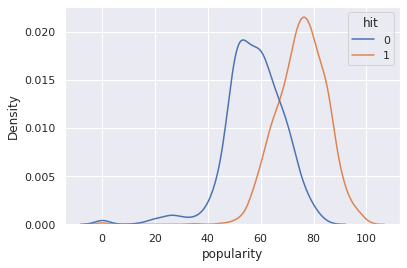

In [ ]:
mainDF.reset_index(inplace=True)
compare= mainDF[['popularity','hit']]
sb.kdeplot(data=compare, x="popularity", hue="hit")

It is evident that hit songs generally have a higher skewed popularity distribution than non-hit songs, but the plot shows that the 2 distributions do overlap at popularity scores of around 50 to 85. These are the songs that we are interested in!

<AxesSubplot:xlabel='popularity', ylabel='hit'>

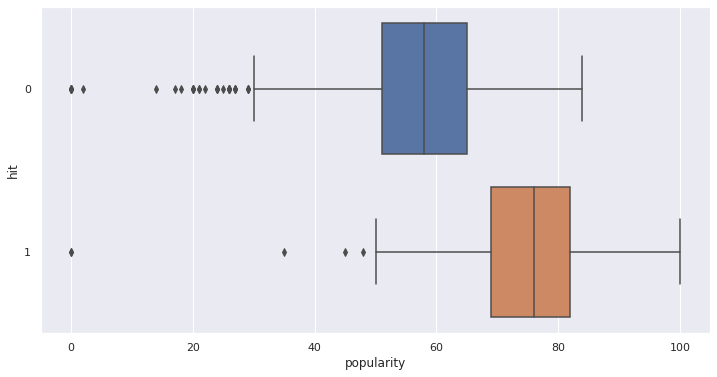

In [ ]:
from sklearn.model_selection import train_test_split

f = plt.figure(figsize=(12, 6))
sb.boxplot(x="popularity", y="hit", data=mainDF[['popularity','hit']], orient="h")

We see here that the hit songs clearly have higher popularity score distribution than non hit songs, with the exception of some outliers.

Using a decision tree, we try to find the relationship between popularity score and whether a song was a hit. 

In [ ]:
# Split 80-20: train-test
# Fit classification tree model on train set to see relationships between popularity and whether it was a hit
# Find cut off point of popularity score for a song to be considered a hit

hitDF = pd.DataFrame(mainDF["hit"])
popDF = pd.DataFrame(mainDF["popularity"])

hitTrain, hitTest, popTrain, popTest = train_test_split(hitDF, popDF, test_size=0.2, random_state=42)
print("Train Set:", hitTrain.shape, popTrain.shape)
print("Test Set:", hitTest.shape, popTest.shape)

Train Set: (2009, 1) (2009, 1)
Test Set: (503, 1) (503, 1)


[Text(0.5, 0.8333333333333334, 'Popularity <= 67.5\ngini = 0.5\nsamples = 2009\nvalue = [996, 1013]\nclass = Hit'),
 Text(0.25, 0.5, 'Popularity <= 60.5\ngini = 0.316\nsamples = 1031\nvalue = [828, 203]\nclass = Not Hit'),
 Text(0.125, 0.16666666666666666, 'gini = 0.146\nsamples = 667\nvalue = [614, 53]\nclass = Not Hit'),
 Text(0.375, 0.16666666666666666, 'gini = 0.485\nsamples = 364\nvalue = [214, 150]\nclass = Not Hit'),
 Text(0.75, 0.5, 'Popularity <= 72.5\ngini = 0.285\nsamples = 978\nvalue = [168, 810]\nclass = Hit'),
 Text(0.625, 0.16666666666666666, 'gini = 0.476\nsamples = 259\nvalue = [101, 158]\nclass = Hit'),
 Text(0.875, 0.16666666666666666, 'gini = 0.169\nsamples = 719\nvalue = [67, 652]\nclass = Hit')]

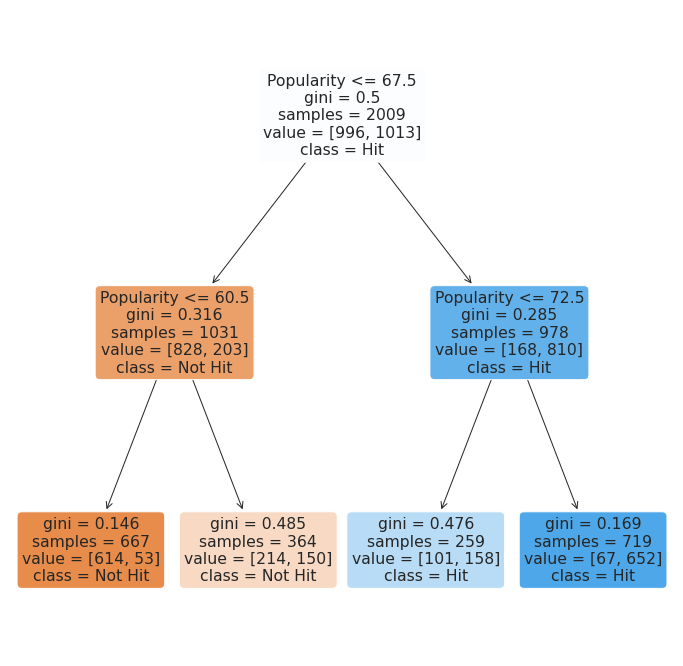

In [ ]:
hitPopTree2 = DecisionTreeClassifier(max_depth=2)
hitPopTree2.fit(popTrain, hitTrain)

f = plt.figure(figsize=(12, 12))
plot_tree(hitPopTree2, filled=True, rounded=True, feature_names=["Popularity"], class_names=["Not Hit", "Hit"])

Classification Accuracy:  0.8153310104529616


<AxesSubplot:>

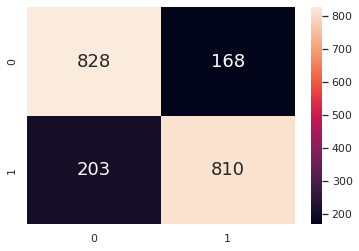

In [ ]:
hitTrainPred2 = hitPopTree2.predict(popTrain)

print("Classification Accuracy: ", hitPopTree2.score(popTrain, hitTrain))

sb.heatmap(confusion_matrix(hitTrain, hitTrainPred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy:  0.7872763419483101


<AxesSubplot:>

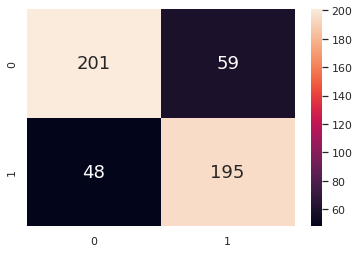

In [ ]:
hitTestPred2 = hitPopTree2.predict(popTest)
print("Classification Accuracy: ", hitPopTree2.score(popTest, hitTest))

sb.heatmap(confusion_matrix(hitTest, hitTestPred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Popularity does generally determine whether a song will be a hit or not. However, there are certain popular songs that did not emerge as hits or songs that were not popular but ended up as hits.

# Prediction 1: The Overlooked

## Which songs were popular enough to be hits but were not?

Using the tree model from problem 1, we try to find non-hit songs that should have been hits based on their popularity score. These are songs that deserved a place on the top charts but were robbed - The Overlooked.

In [ ]:
# Look for songs that were not hit but is predicted to be hit
# Use tree model from problem 3 and input songs in songsDF that are not in mainDF

# Songs not used to train model
popularity_from_untrained_untested_songsDF = pd.DataFrame(untrained_untested_songsDF['popularity'])
popularity_from_untrained_untested_songsDF_pred = hitPopTree2.predict(popularity_from_untrained_untested_songsDF)
popularity_from_untrained_untested_songsDF_pred_dataFrame = pd.DataFrame(popularity_from_untrained_untested_songsDF_pred, columns=["predicted_hit"])

In [ ]:
# Append results of prediction to dataFrame
popularity_pred_DF = pd.merge(untrained_untested_songsDF, popularity_from_untrained_untested_songsDF_pred_dataFrame, left_index=True, right_index=True, how="left")
popularity_pred_DF[["track_name", "artist_name", "popularity", "predicted_hit"]]

,track_name,artist_name,popularity,predicted_hit
0,C'est beau de faire un Show,Henri Salvador,0,0.0
1,Perdu d'avance (par Gad Elmaleh),Martin & les fées,1,0.0
2,Don't Let Me Be Lonely Tonight,Joseph Williams,3,0.0
3,Dis-moi Monsieur Gordon Cooper,Henri Salvador,0,0.0
4,Ouverture,Fabien Nataf,4,0.0
...,...,...,...,...
232716,Quickly (feat. Brandy),John Legend,39,NaN
232717,P.O.P.,Belly,43,NaN
232719,I'll Take Care Of You - Single Version,"Bobby ""Blue"" Bland",32,NaN
232721,Burning Fire,Jr Thomas & The Volcanos,38,NaN


In [ ]:
overlooked_dataFrame = popularity_pred_DF.loc[popularity_pred_DF["predicted_hit"] == 1]
overlooked_dataFrame.sort_values(by=['popularity'], ascending=False, inplace=True)
overlooked_dataFrame[["track_name", "artist_name", "popularity", "predicted_hit"]]

,track_name,artist_name,popularity,predicted_hit
13585,Kiss and Make Up,Dua Lipa,87,1.0
107878,Project Dreams,Marshmello,83,1.0
87434,Call Out My Name,The Weeknd,83,1.0
13739,I Miss You (feat. Julia Michaels),Clean Bandit,83,1.0
13643,Rewrite The Stars (with James Arthur & Anne-Ma...,James Arthur,83,1.0
...,...,...,...,...
75363,Since U Been Gone,Juice Music,0,1.0
75330,Rudolph The Red Nosed Reindeer - Karaoke Version,Juice Music,0,1.0
73850,Gardener at Home,Kimbo Children's Music,0,1.0
60712,Who Changed,Melii,0,1.0


It is odd that some songs with a popularity score with 0 are predicted to be hits. This shows that our model might not be accurate enough, and might be overfitted to the train data. We will try using random forest instead to see if it yields better results

### Classification by Random Forest

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
Classification Accuracy:  0.8168242906918866


<AxesSubplot:>

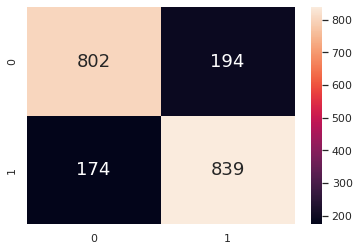

In [ ]:
# Import the random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)

rf.fit(popTrain,hitTrain)
hitTrain_pred=rf.predict(popTrain)

print("Classification Accuracy: ", rf.score(popTrain, hitTrain))

sb.heatmap(confusion_matrix(hitTrain, hitTrain_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


Classification Accuracy:  0.7793240556660039


<AxesSubplot:>

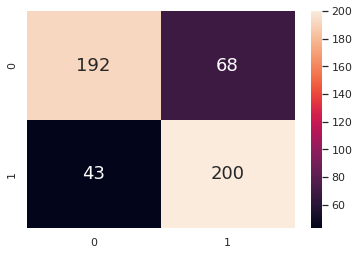

In [ ]:
hitTest_pred = rf.predict(popTest)
print("Classification Accuracy: ", rf.score(popTest, hitTest))

sb.heatmap(confusion_matrix(hitTest, hitTest_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
# Look for songs that were not hit but is predicted to be hit
# Use randomforest model on untrained_untested_songsDF

# Songs not used to train model
rf_pred = rf.predict(popularity_from_untrained_untested_songsDF)
rf_pred_dataFrame = pd.DataFrame(popularity_from_untrained_untested_songsDF_pred, columns=["predicted_hit"])

In [ ]:
# Append results of prediction to dataFrame
pop_rf_pred_DF = pd.merge(untrained_untested_songsDF, rf_pred_dataFrame, left_index=True, right_index=True, how="left")
pop_rf_pred_DF[["track_name", "artist_name", "popularity", "predicted_hit"]]

,track_name,artist_name,popularity,predicted_hit
0,C'est beau de faire un Show,Henri Salvador,0,0.0
1,Perdu d'avance (par Gad Elmaleh),Martin & les fées,1,0.0
2,Don't Let Me Be Lonely Tonight,Joseph Williams,3,0.0
3,Dis-moi Monsieur Gordon Cooper,Henri Salvador,0,0.0
4,Ouverture,Fabien Nataf,4,0.0
...,...,...,...,...
232716,Quickly (feat. Brandy),John Legend,39,NaN
232717,P.O.P.,Belly,43,NaN
232719,I'll Take Care Of You - Single Version,"Bobby ""Blue"" Bland",32,NaN
232721,Burning Fire,Jr Thomas & The Volcanos,38,NaN


In [ ]:
overlooked_rf_dataFrame = pop_rf_pred_DF.loc[pop_rf_pred_DF["predicted_hit"] == 1]
overlooked_rf_dataFrame.sort_values(by=['popularity'], ascending=False, inplace=True)
overlooked_rf_dataFrame[["track_name", "artist_name", "popularity", "predicted_hit"]]

,track_name,artist_name,popularity,predicted_hit
13585,Kiss and Make Up,Dua Lipa,87,1.0
107878,Project Dreams,Marshmello,83,1.0
87434,Call Out My Name,The Weeknd,83,1.0
13739,I Miss You (feat. Julia Michaels),Clean Bandit,83,1.0
13643,Rewrite The Stars (with James Arthur & Anne-Ma...,James Arthur,83,1.0
...,...,...,...,...
75363,Since U Been Gone,Juice Music,0,1.0
75330,Rudolph The Red Nosed Reindeer - Karaoke Version,Juice Music,0,1.0
73850,Gardener at Home,Kimbo Children's Music,0,1.0
60712,Who Changed,Melii,0,1.0


In [ ]:
# find songs that are below median

lower_overlooked_rf_dataFrame = overlooked_rf_dataFrame[(overlooked_rf_dataFrame["popularity"] < overlooked_rf_dataFrame["popularity"].median())]
lower_overlooked_rf_dataFrame[["track_name", "artist_name", "popularity", "predicted_hit"]]

,track_name,artist_name,popularity,predicted_hit
60588,Unknown,Ravyn Lenae,49,1.0
61364,Who Came Up Missin,Arin Ray,49,1.0
60853,Interlude: No Limits,Solange,49,1.0
60856,Surprise Yourself - GRYFFIN x Manila Killa Remix,Jack Garratt,49,1.0
60743,Still,Jeff Bernat,49,1.0
...,...,...,...,...
75363,Since U Been Gone,Juice Music,0,1.0
75330,Rudolph The Red Nosed Reindeer - Karaoke Version,Juice Music,0,1.0
73850,Gardener at Home,Kimbo Children's Music,0,1.0
60712,Who Changed,Melii,0,1.0


In [ ]:
# For API
# Get top 20 songs based on popularity
tracks = lower_overlooked_rf_dataFrame["track_id"].values.tolist()[:20]
overlooked_playlist = {"uris": []}
for i in tracks:
    uri = "spotify:track:" + i
    overlooked_playlist["uris"].append(uri)

overlooked_playlist

{'uris': ['spotify:track:1wCManUnBwrfpnwTaV93ho',
  'spotify:track:66z1OxQCLYv4Kl54Yun2as',
  'spotify:track:3u8BTavdqT8zZVt5qFDZQo',
  'spotify:track:5Q17mAldONliLKiSKpikRv',
  'spotify:track:6sv7ZmasB6qSiF8hWJNpDG',
  'spotify:track:6P2BlKa7uBwKV6KVsEBkmv',
  'spotify:track:1UFg9EPjaPAiHl9lurJK0I',
  'spotify:track:1UBCUQp3areFyJZjTwLz9g',
  'spotify:track:0usNKTkmarDhxXsz4f2gmq',
  'spotify:track:4vxm2gnST3bQer60vY1pJp',
  'spotify:track:10TN0WSmKI3O6yJuRNblYg',
  'spotify:track:3V7eBu71RmMYiR8w1lNlRu',
  'spotify:track:0A9DOIanDkwtxDjC4xf7D7',
  'spotify:track:49aUxrufliNDGj7MTm7pNU',
  'spotify:track:6vLwOFz5BYeEJPyvgUea2D',
  'spotify:track:2YrY6NOa7tpNCgOUnTloj5',
  'spotify:track:2RZZTpMYCpb86ZMmrnAbe9',
  'spotify:track:16fSY5WgY1DIEUEzfbYTJv',
  'spotify:track:7gtV9GNeU797beAEhAl2qA',
  'spotify:track:7EylApIgCvOGodzaRV35Hy']}

# Problem 2: Audio Features VS Hit Status

## Which audio features are most important in determining if a song was a hit? 

### Numerical Features

In [ ]:
# For comparing numeric features
audioNumHitDF = pd.DataFrame(mainDF[["hit", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]])
audioNumHitDF

,hit,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1,0.414,0.748,244960,0.524,0.000000,0.1110,-5.599,0.0338,95.010,0.661
1,1,0.406,0.720,251088,0.763,0.000000,0.1800,-4.068,0.0523,101.965,0.742
2,1,0.142,0.794,291893,0.632,0.000000,0.1280,-6.163,0.0649,145.926,0.355
3,1,0.108,0.927,210937,0.488,0.000000,0.1960,-9.433,0.4200,133.987,0.605
4,1,0.034,0.818,225983,0.803,0.000000,0.1530,-4.282,0.0797,106.970,0.632
...,...,...,...,...,...,...,...,...,...,...,...
2507,0,0.369,0.732,325173,0.554,0.000001,0.0762,-13.553,0.0336,114.045,0.746
2508,0,0.373,0.825,211893,0.526,0.000001,0.2530,-5.346,0.2470,95.676,0.756
2509,0,0.745,0.576,206640,0.234,0.343000,0.1200,-15.522,0.0293,88.529,0.364
2510,0,0.625,0.377,267040,0.152,0.000037,0.1670,-14.857,0.0406,69.969,0.118


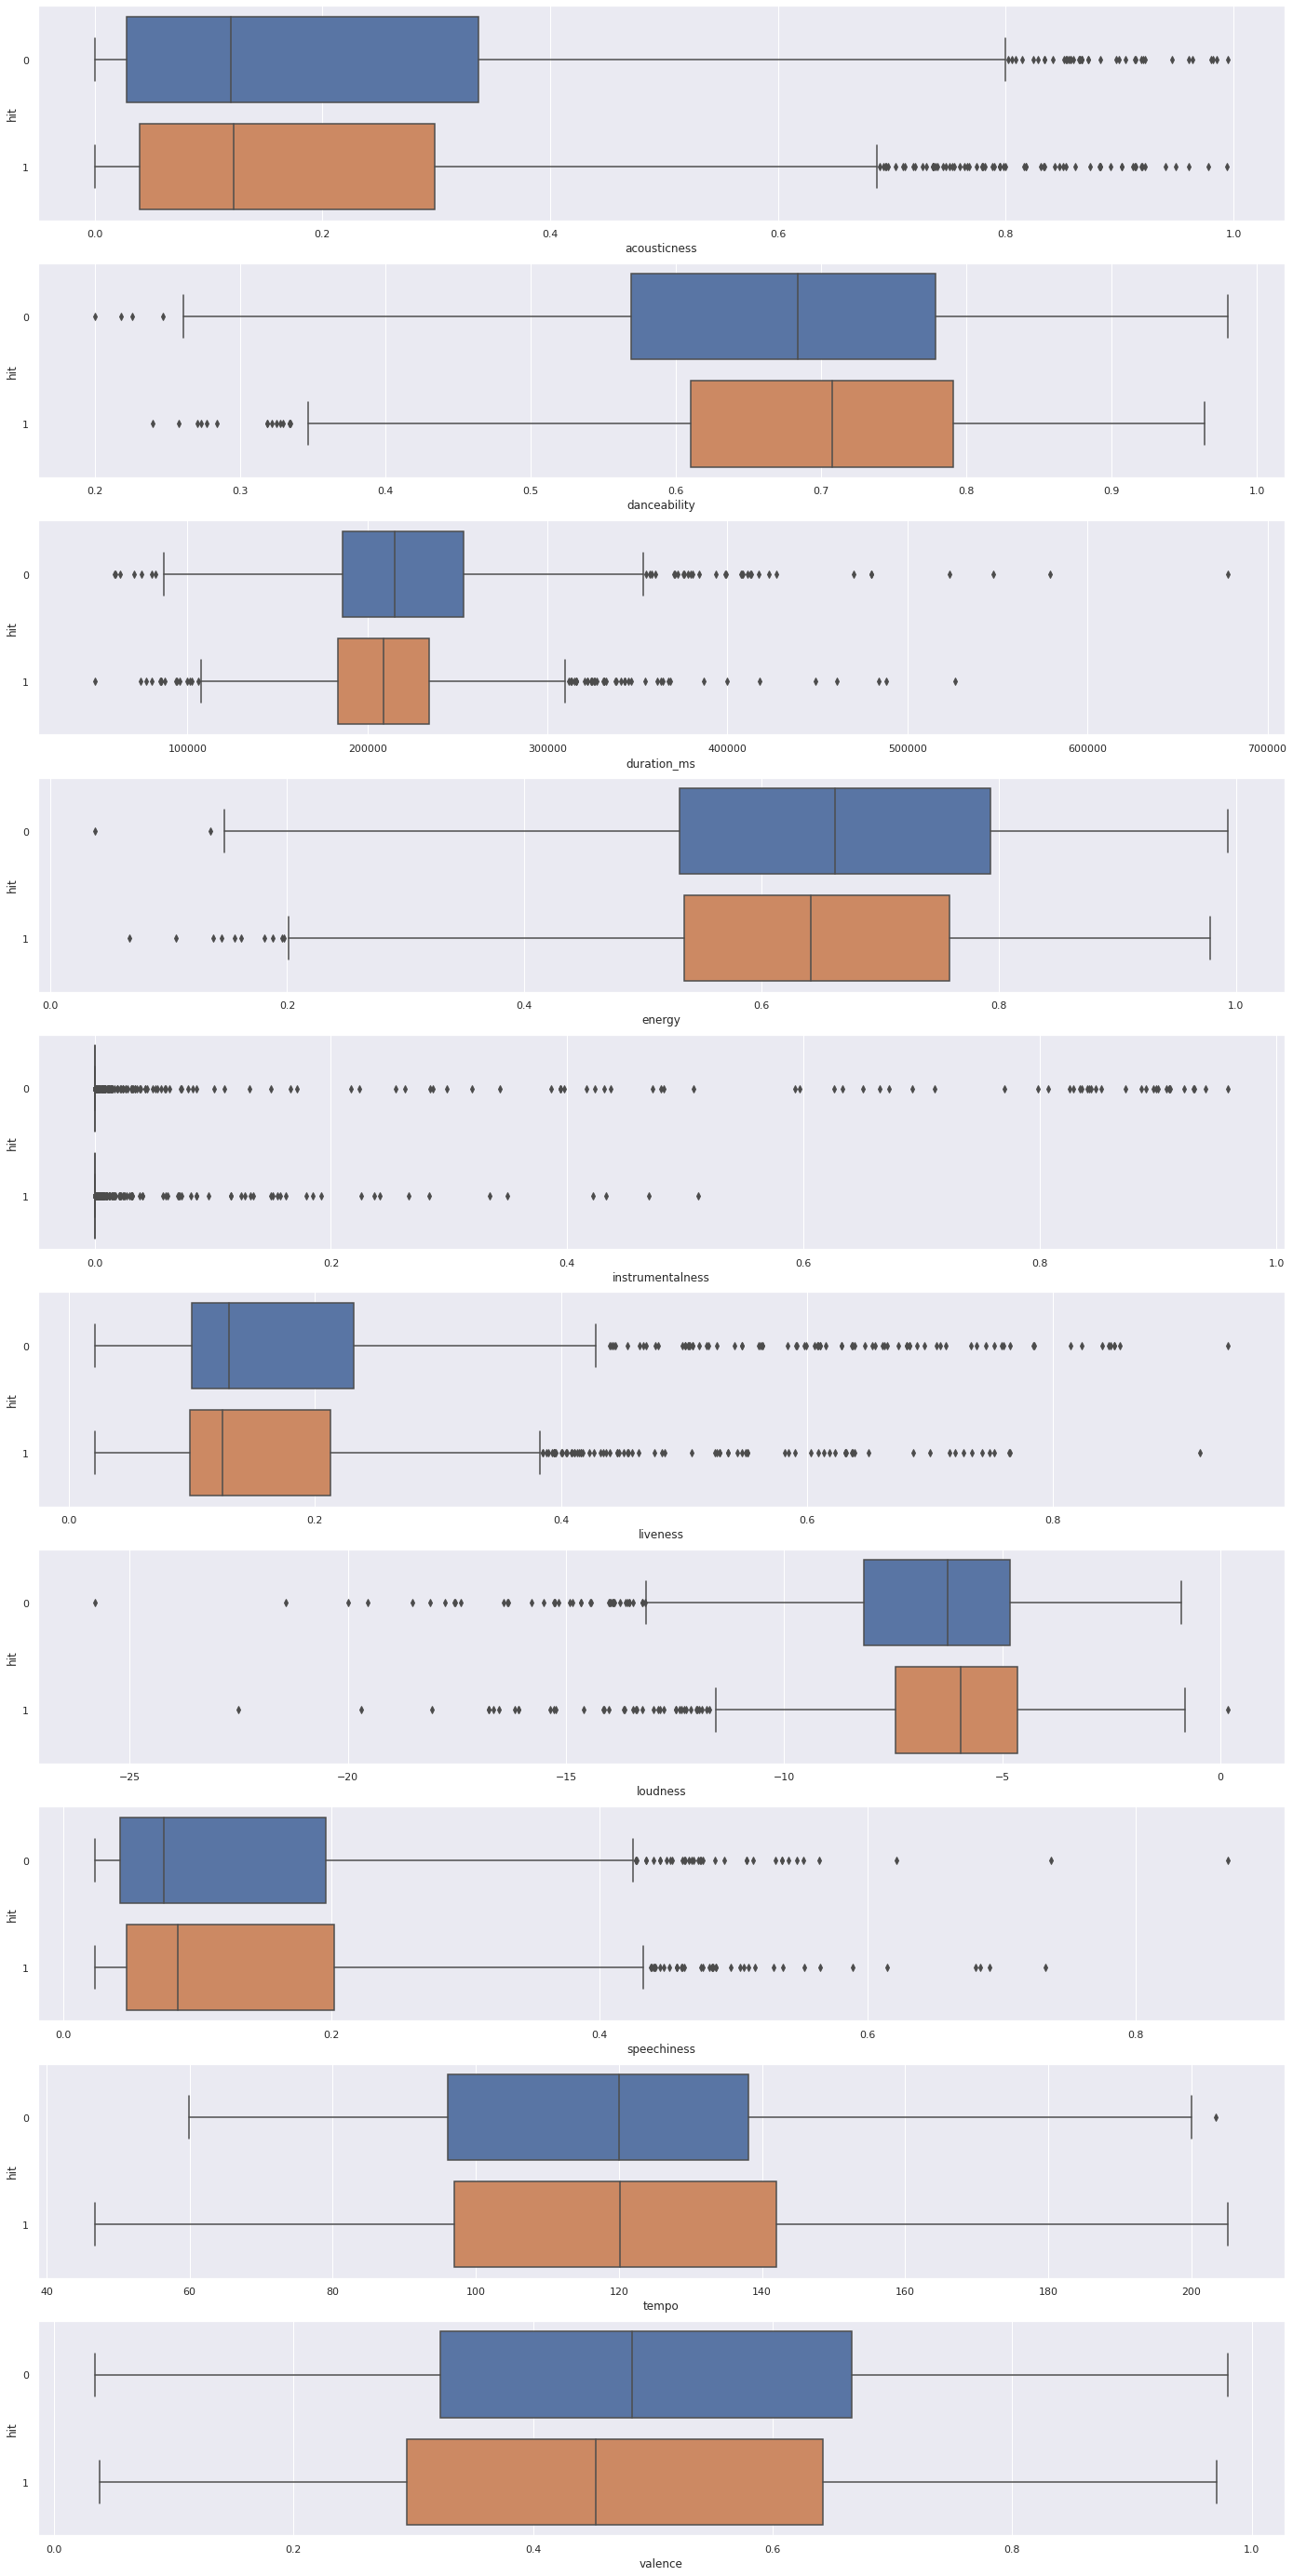

In [ ]:
audioNumFeatures = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
f, axes = plt.subplots(len(audioNumFeatures), 1, figsize=(24, 50))
index = 0

for var in audioNumFeatures:
    sb.boxplot(data = audioNumHitDF, x = audioNumHitDF[var], y = 'hit', ax=axes[index], orient="h")
    index += 1

From the boxplots, it is hard to visibly tell which audio feature has a greater impact on whether a song is a hit. Every feature has a significant overlap in terms of the region of the hit versus no hit box although some overlap slightly lesser. To avoid unaccurate judgement via the human eyes, we will turn to using Decision Tree

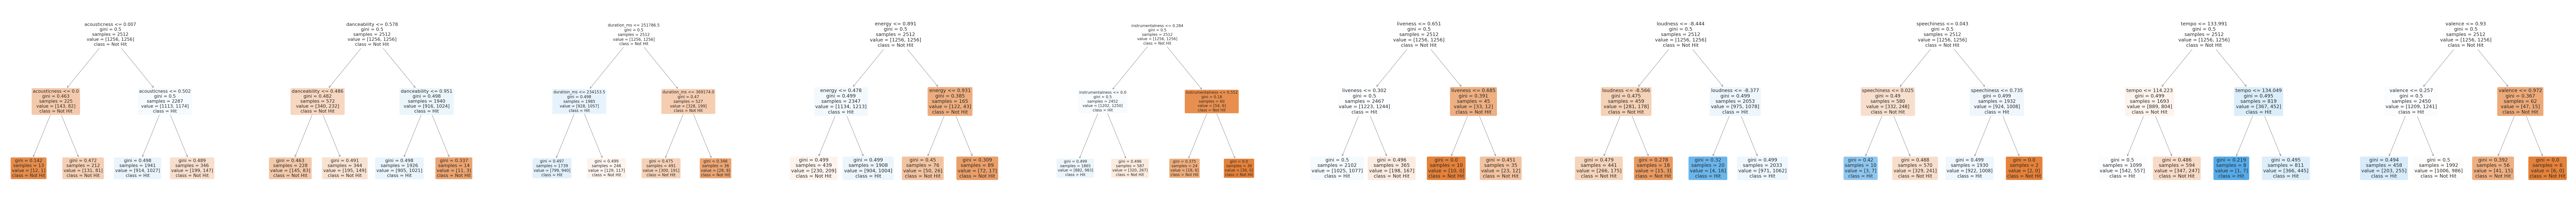

In [ ]:
# Classification Tree model of max depth 2
dec2tree = DecisionTreeClassifier(max_depth = 2)
f, axes = plt.subplots(1, len(audioNumFeatures), figsize=(250, 20), dpi=80)
index = 0

for var in audioNumFeatures:
    dec2tree.fit(pd.DataFrame(audioNumHitDF[var]), pd.DataFrame(audioNumHitDF['hit']))
    plot_tree(dec2tree, filled=True, rounded=True, feature_names=[var], class_names=["Not Hit","Hit"], ax=axes[index])
    index += 1

To check how good the predictions are, we use classification accuracy and confusion matrix

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# For Qn 5 use since classification accuracy may change when notebook is rerun
classification_accuracy_numerical_audio_features_list = []

for var in audioNumFeatures:
    print("Classification Accuracy for " + var + ":", dec2tree.score(pd.DataFrame(audioNumHitDF[var]), pd.DataFrame(audioNumHitDF['hit'])))
    classification_accuracy_numerical_audio_features_list.append((var, dec2tree.score(pd.DataFrame(audioNumHitDF[var]), pd.DataFrame(audioNumHitDF['hit']))))


Classification Accuracy for acousticness: 0.5195063694267515
Classification Accuracy for danceability: 0.49880573248407645
Classification Accuracy for duration_ms: 0.5
Classification Accuracy for energy: 0.49880573248407645
Classification Accuracy for instrumentalness: 0.5187101910828026
Classification Accuracy for liveness: 0.5171178343949044
Classification Accuracy for loudness: 0.5
Classification Accuracy for speechiness: 0.4984076433121019
Classification Accuracy for tempo: 0.5
Classification Accuracy for valence: 0.5207006369426752


While it seems like none of the audio features are able to accurately distinguish a song as a hit, the classification accuracy for valence stands out above the rest at ~3% above the nearest neighbour. If you want to produce a hit song, you can't go wrong making it sound more positive ~cue Happy by Pharrell Williams

### Categorical Features

In [ ]:
# For comparing categorical features
audioCatHitDF = pd.DataFrame(mainDF[["hit", "key", "mode", "time_signature"]])
audioCatHitDF

,hit,key,mode,time_signature
0,1,G#,Major,4/4
1,1,A,Minor,4/4
2,1,C,Major,4/4
3,1,A,Minor,4/4
4,1,C#,Major,4/4
...,...,...,...,...
2507,0,B,Major,4/4
2508,0,G#,Minor,4/4
2509,0,G#,Minor,4/4
2510,0,F,Major,4/4


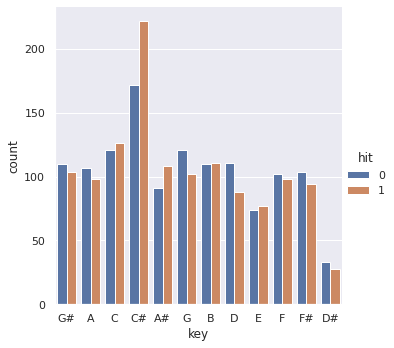

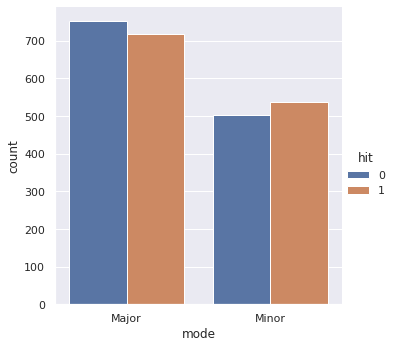

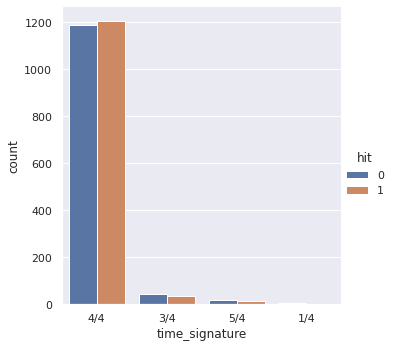

In [ ]:
audioCatFeatures = ["key", "mode", "time_signature"]
# no point in considering genre actually since we balanced the dataframe 
# by picking hit and no hit based on genre

for var in audioCatFeatures:
    sb.catplot(data = audioCatHitDF, x = var, hue="hit", kind = "count")   

Among categorical features, only the key of the song appears to affect a song's hit status, seeing how songs in the key of C# have higher distribution of hits than non-hits. However, the we cannot tell or visualise the relationship between categorical features and a categorical prediction of hit status. We have chosen to omit prediction using categorical predictors as it is out of the scope of this project.

# Prediction 2: The Ones That Got Away

## Which songs sounded like hits but were not hits? 

With another decision tree using the top 3 audio features as predictors (from problem 2), we find the songs that sounded most like hits, but somehow didn't make the charts - The Ones That Got Away.

In [ ]:
# Do classification tree model on train set to predict if a song will be a hit 
# based on the 3 most correlated audio features (from 2)
# Use the same model on test set, predict songs that should have been hits
# Make a playlist for top 10 songs that should have been hits

# Categorical features were not considered due to insufficient comparative features

classification_accuracy_numerical_audio_features_list.sort(key = lambda x: x[1], reverse=True)
feature1, feature2, feature3 = classification_accuracy_numerical_audio_features_list[:3]

for feature in classification_accuracy_numerical_audio_features_list:
    print("{}:\t{}".format(feature[0], feature[1]))

valence:	0.5207006369426752
acousticness:	0.5195063694267515
instrumentalness:	0.5187101910828026
liveness:	0.5171178343949044
duration_ms:	0.5
loudness:	0.5
tempo:	0.5
danceability:	0.49880573248407645
energy:	0.49880573248407645
speechiness:	0.4984076433121019


Looking at the numerical features that provides the highest classification accuracy, we will then look to use these variables to predict whether certain songs would have been hits

## Multi-Variate Classification Tree  

Response Variable : **Hit**     
Predictor Feature : **Top 3 Features with highest Classification Accuracy**       

Extract the variables and the associated data as a Pandas `DataFrame`.

In [ ]:
# Extract Response and Predictors
gotAway_Response = pd.DataFrame(mainDF["hit"])
gotAway_Predictors = pd.DataFrame(mainDF[[feature1[0], feature2[0], feature3[0]]])

gotAway_visualiser = pd.concat([gotAway_Response, gotAway_Predictors], axis=1)
gotAway_visualiser

,hit,valence,acousticness,instrumentalness
0,1,0.661,0.414,0.000000
1,1,0.742,0.406,0.000000
2,1,0.355,0.142,0.000000
3,1,0.605,0.108,0.000000
4,1,0.632,0.034,0.000000
...,...,...,...,...
2507,0,0.746,0.369,0.000001
2508,0,0.756,0.373,0.000001
2509,0,0.364,0.745,0.343000
2510,0,0.118,0.625,0.000037


In [ ]:

# Split the Dataset into Train and Test
gotAway_Response_train, gotAway_Response_test, gotAway_Predictors_train, gotAway_Predictors_test = train_test_split(gotAway_Response, gotAway_Predictors, test_size = 0.20)

# Check the sample sizes
print("Train Set :", gotAway_Response_train.shape, gotAway_Predictors_train.shape)
print("Test Set  :", gotAway_Response_test.shape, gotAway_Predictors_test.shape)

Train Set : (2009, 1) (2009, 3)
Test Set  : (503, 1) (503, 3)


[Text(0.5, 0.8333333333333334, 'instrumentalness <= 0.284\ngini = 0.5\nsamples = 2009\nvalue = [1019, 990]\nclass = Not Hit'),
 Text(0.25, 0.5, 'valence <= 0.93\ngini = 0.5\nsamples = 1955\nvalue = [970, 985]\nclass = Hit'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 1905\nvalue = [932, 973]\nclass = Hit'),
 Text(0.375, 0.16666666666666666, 'gini = 0.365\nsamples = 50\nvalue = [38, 12]\nclass = Not Hit'),
 Text(0.75, 0.5, 'acousticness <= 0.0\ngini = 0.168\nsamples = 54\nvalue = [49, 5]\nclass = Not Hit'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Hit'),
 Text(0.875, 0.16666666666666666, 'gini = 0.14\nsamples = 53\nvalue = [49, 4]\nclass = Not Hit')]

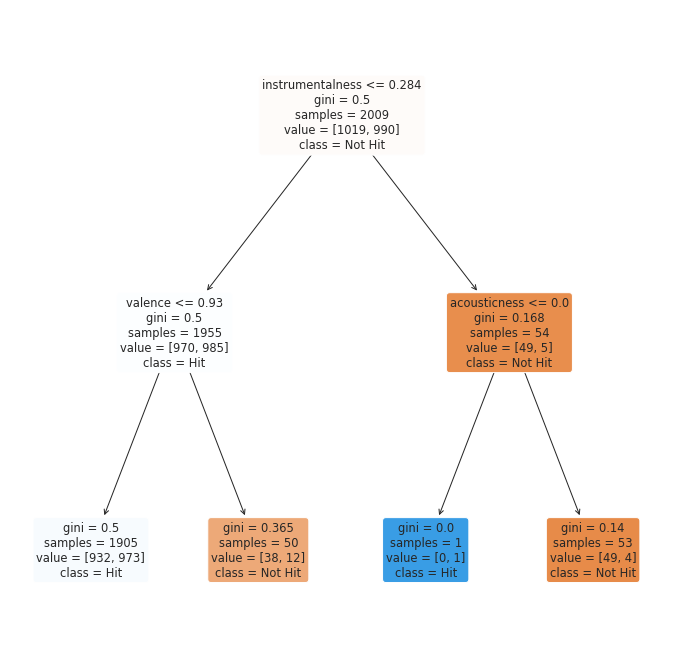

In [ ]:
# Decision Tree using Train Data
gotAway_tree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
gotAway_tree.fit(gotAway_Predictors_train, gotAway_Response_train)                  # train the decision tree model

f = plt.figure(figsize=(12,12))
plot_tree(gotAway_tree, filled=True, rounded=True, 
          feature_names=gotAway_Predictors.columns, 
          class_names=["Not Hit","Hit"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5281234444997511

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5447316103379721



<AxesSubplot:>

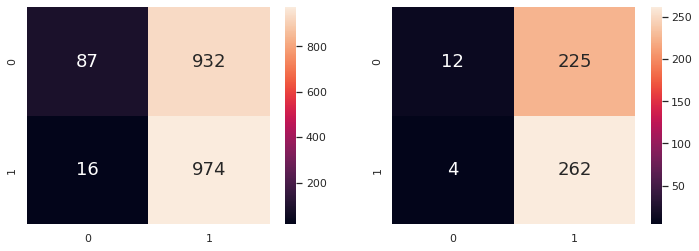

In [ ]:
# Predict Hit or Not Hit corresponding to Prediction Variables
gotAway_Response_train_pred = gotAway_tree.predict(gotAway_Predictors_train)
gotAway_Response_test_pred = gotAway_tree.predict(gotAway_Predictors_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gotAway_tree.score(gotAway_Predictors_train, gotAway_Response_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gotAway_tree.score(gotAway_Predictors_test, gotAway_Response_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(gotAway_Response_train, gotAway_Response_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(gotAway_Response_test, gotAway_Response_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [ ]:
# Use tree model from above and input untrained_untested_songsDF
top_3_features_from_untrained_untested_songsDF = pd.DataFrame(untrained_untested_songsDF[[feature1[0], feature2[0], feature3[0]]])
top_3_features_from_untrained_untested_songsDF_pred = gotAway_tree.predict(top_3_features_from_untrained_untested_songsDF)

# Append results of prediction to dataFrame
top_3_features_from_untrained_untested_songsDF_pred_dataFrame = pd.DataFrame(top_3_features_from_untrained_untested_songsDF_pred, columns=["predicted_hit"])
top_3_features_pred_DF = pd.merge(untrained_untested_songsDF, top_3_features_from_untrained_untested_songsDF_pred_dataFrame, left_index=True, right_index=True, how="left")
top_3_features_pred_DF

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,predicted_hit
0,0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1.0
1,0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1.0
2,0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,1.0
3,0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,1.0
4,0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,Soul,John Legend,Quickly (feat. Brandy),39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770,NaN
232717,2gGqKJWfWbToha2YmDxnnj,Soul,Belly,P.O.P.,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482,NaN
232719,2iZf3EUedz9MPqbAvXdpdA,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497,NaN
232721,1qWZdkBl4UVPj9lK6HuuFM,Soul,Jr Thomas & The Volcanos,Burning Fire,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,NaN


In [ ]:
gotAway_dataFrame = top_3_features_pred_DF.loc[top_3_features_pred_DF["predicted_hit"] == 1]
gotAway_dataFrame.sort_values(by=['popularity'], ascending=False, inplace=True)
gotAway_dataFrame

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,predicted_hit
9033,5Il6Oe7lr5XM7A0cWbVQtr,Dance,Ariana Grande,bad idea,91,0.0268,0.847,267107,0.579,0.054500,C#,0.1020,-5.314,Major,0.0719,137.998,4/4,0.569,1.0
9030,4uTvPEr01pjTbZgl7jcKBD,Dance,Ariana Grande,NASA,91,0.4510,0.747,182000,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,4/4,0.470,1.0
9043,6QfS2wq5sSC1xAJCQsTSlj,Dance,Lady Gaga,Shallow - Radio Edit,90,0.4160,0.575,217213,0.330,0.000000,G,0.0872,-6.557,Major,0.0310,95.801,4/4,0.277,1.0
13585,7jr3iPu4O4bTCVwLMbdU2i,Dance,Dua Lipa,Kiss and Make Up,87,0.0658,0.678,189173,0.729,0.000000,G#,0.3030,-4.188,Major,0.1370,99.895,4/4,0.643,1.0
107973,1EzrEOXmMH3G43AXT1y7pA,Pop,Jason Mraz,I'm Yours,85,0.5950,0.686,242187,0.457,0.000000,B,0.1050,-8.322,Major,0.0468,150.953,4/4,0.718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74933,7lHeDwYT4KIy9Kr9Qt7er2,Children's Music,Children Songs Company,Yankee Doodle's Come to Town,0,0.9960,0.661,132840,0.302,0.000012,C#,0.3100,-10.350,Minor,0.3740,152.173,4/4,0.902,1.0
74934,7pSbnEWvUnaFdLEBbF5yVT,Children's Music,Children Songs Company,The Jolly Clowns,0,0.9960,0.847,123813,0.227,0.909000,D,0.1670,-10.281,Minor,0.1640,115.901,4/4,0.731,1.0
74936,11C3grVWoGYTEhORsnMfCt,Children's Music,Children Songs Company,Nomore,0,0.6210,0.377,293320,0.622,0.000000,C#,0.1110,-9.274,Major,0.4740,80.166,4/4,0.518,1.0
74937,1bK535Gb6oqfEO3m2J4SF6,Children's Music,Children Songs Company,Jolly Coppersmith,0,0.9950,0.784,133747,0.275,0.146000,G#,0.2660,-6.686,Major,0.3340,127.489,4/4,0.786,1.0


In [ ]:
lower_gotAway_dataFrame = gotAway_dataFrame[(gotAway_dataFrame["popularity"] < gotAway_dataFrame['popularity'].median())]
lower_gotAway_dataFrame[["track_name", "artist_name", "popularity", "predicted_hit"]]

,track_name,artist_name,popularity,predicted_hit
48685,Charlie Brown - 2007 Remaster Stereo Single Ve...,The Coasters,37,1.0
132014,Backburner,Mike Pinto,37,1.0
125134,The Unanswered Question,Charles Ives,37,1.0
162548,Ojos Café,L'Omy,37,1.0
7185,In a Week or Two,Diamond Rio,37,1.0
...,...,...,...,...
74933,Yankee Doodle's Come to Town,Children Songs Company,0,1.0
74934,The Jolly Clowns,Children Songs Company,0,1.0
74936,Nomore,Children Songs Company,0,1.0
74937,Jolly Coppersmith,Children Songs Company,0,1.0


In [ ]:
# For API
# Get top 20 songs based on popularity
tracks = lower_gotAway_dataFrame["track_id"].values.tolist()[:20]
gotAway_playlist = {"uris": []}
for i in tracks:
    uri = "spotify:track:" + i
    gotAway_playlist["uris"].append(uri)

gotAway_playlist

{'uris': ['spotify:track:6t83zAQg9Efca1u1DPL930',
  'spotify:track:2tk1dkCnspCkTiCL09T8iy',
  'spotify:track:7umTDygSNRwDVYvdp9CGNG',
  'spotify:track:0FDUYGLpr6J1GidRsr4tAQ',
  'spotify:track:7JmtOSoZP6k3VXsPFwS4xZ',
  'spotify:track:7b54tsFVmYigwSH7vRCsuu',
  'spotify:track:4cccAiLlpo0ElbjH2t909O',
  'spotify:track:3IC8Rm2a46m3lcy3icCXQU',
  'spotify:track:63RtRAGENJvFw4oGcOJ29L',
  'spotify:track:62gIIYPpk8UfTNAYCmmBPW',
  'spotify:track:6JIeedN6tRWMDF91c7DHgo',
  'spotify:track:1EAuRuC7lIgIVLwXaZoHLo',
  'spotify:track:0cpb17PZTqMYuYgKDkC7EJ',
  'spotify:track:1NAskEmdf5VNtnIucIs1zO',
  'spotify:track:45E48qVaJYiWC2Dh2Nu559',
  'spotify:track:2IZIg0KNuTYL6NEXbp9uxt',
  'spotify:track:7cIwjx6z1bSq1IKhr150BA',
  'spotify:track:6QQ8diRSTraMgZIE4O0LNy',
  'spotify:track:6rVXa1UnwD12ykvQ4hA6vA',
  'spotify:track:0ID91jFDQ5tlA4feR5n4Ws']}

# Problem 3: Audio Features VS Popularity

## Which audio features are most important in determining song popularity?

### Numerical Variables

<AxesSubplot:>

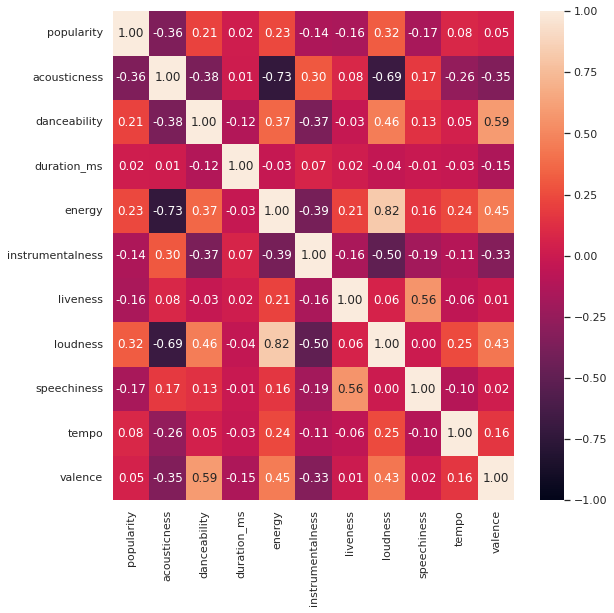

In [ ]:
f = plt.figure(figsize=(9, 9))
sb.heatmap(songsDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

We observe that loudness is strongly correlated with energy, which make sense since loud songs are usually energetic and vice versa.  Energy and loudness also have a strong negative correlation with acousticness, since acoustic songs tend to be softer and more mellow. However, it seems that there is poor correlation between all the audio feature variables and popularity scores, so we will choose the 3 features with the strongest correlations, which are acousticness, loudness and energy.

### Categorical Variables

<AxesSubplot:xlabel='key', ylabel='popularity'>

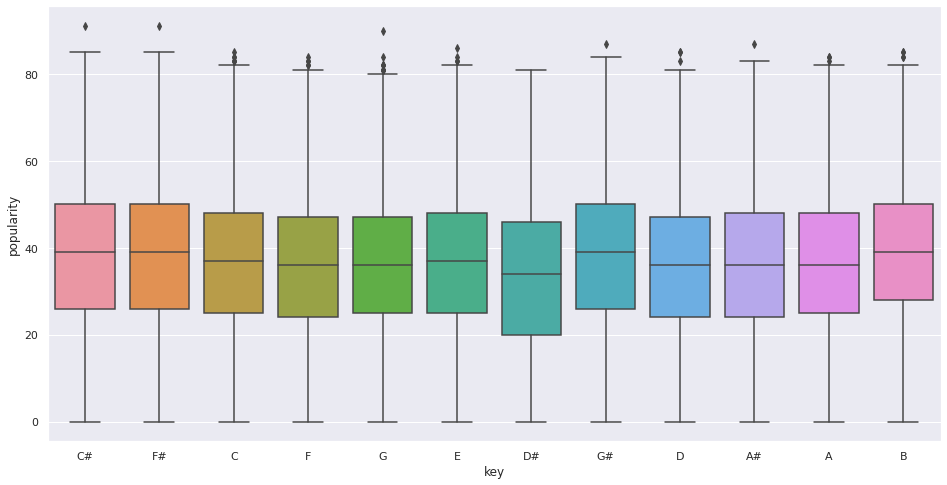

In [ ]:
# compare categorical features - plot boxplot of each feature against popularity
# audioCatDF = pd.DataFrame(mainDF[["popularity","key", "mode", "time_signature", "genre"]])

keyPopularity = songsDF[['key', 'popularity']]

f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'key', y = 'popularity', data = keyPopularity)

<AxesSubplot:xlabel='mode', ylabel='popularity'>

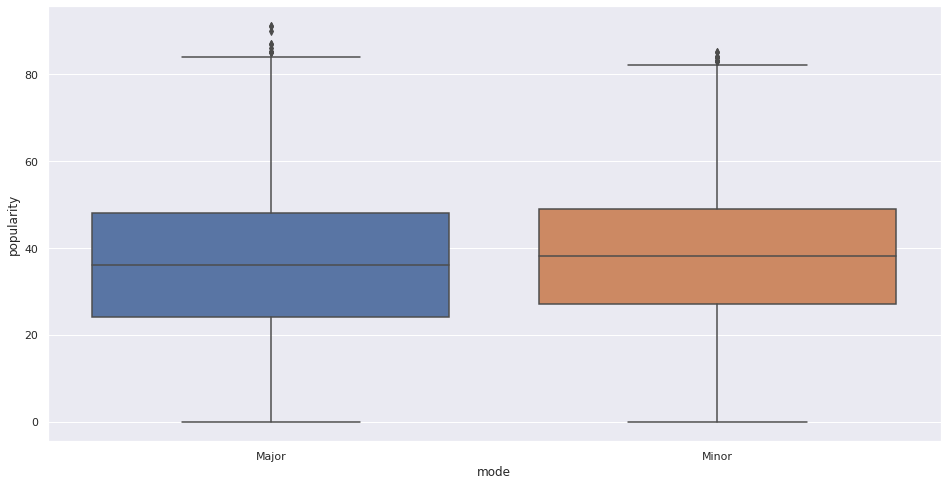

In [ ]:
modePopularity = songsDF[['mode', 'popularity']]
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'mode', y = 'popularity', data = modePopularity)

<AxesSubplot:xlabel='time_signature', ylabel='popularity'>

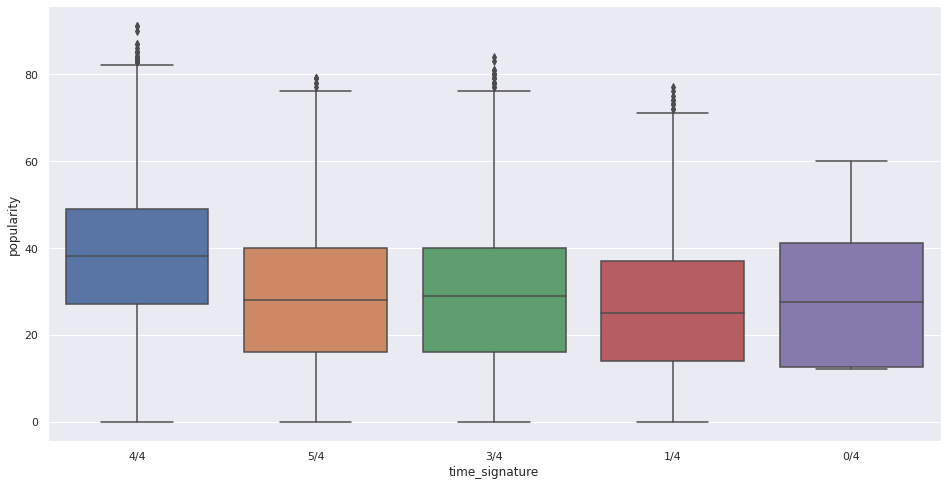

In [ ]:
tsPopularity = songsDF[['time_signature', 'popularity']]
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'time_signature', y = 'popularity', data = tsPopularity)

<AxesSubplot:xlabel='genre', ylabel='popularity'>

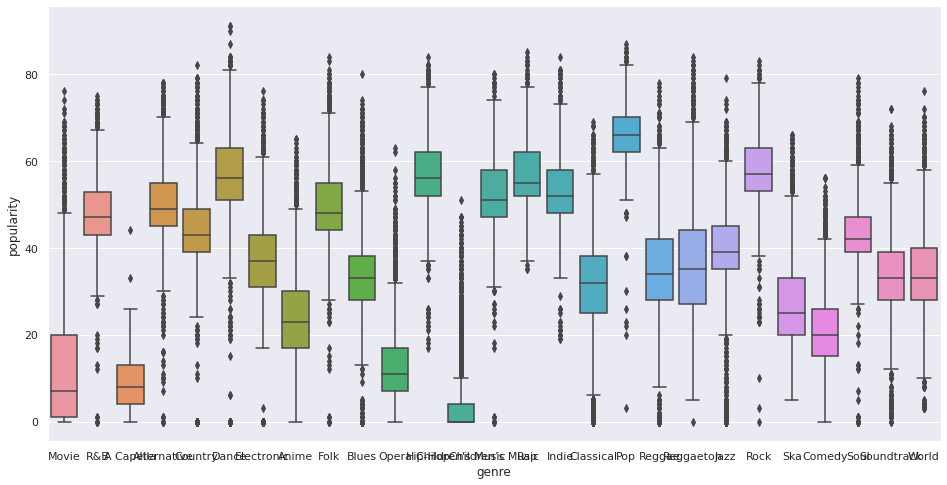

In [ ]:
genrePopularity = songsDF[['genre', 'popularity']]
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'genre', y = 'popularity', data = genrePopularity)

It seems like out of all the categorical variables, the variance in popularity is the greatest across genres. We can see that Pop, Rap, Dance and Hip-Hop songs tend to have higher mean popularity scores and greater distribution towards higher popularity scores than lower. This is probably because these 4 genres are the 4 largest genres in terms of proportion in our hit songs dataset. 

# Prediction 3: The Criminally Underrated

## Which songs sounded like popular songs but were not?

We try to predict a song's popularity score based on its top 3 audio features (from problem 1). We then find the outliers, songs that were predicted to be popular, yet did not receive as much love in actuality - The Criminally Underrated.

In [ ]:
# on train set, do linear reg to predict a song’s popularity score 
# based on 3 most correlated features (from 1)
# use the same model on test set, predict  popularity score
# find songs with predicted popularity score >> actual score
# rank these songs by descending order of difference btw predicted and actual popularity score
# make a playlist for top 10 underrated songs

# Extract response and predictors
y = pd.DataFrame(songsDF["popularity"])
X = pd.DataFrame(songsDF[["acousticness", "energy", "loudness"]])
# X = pd.DataFrame(songsDF[["acousticness", "energy", "loudness", "danceability", "duration_ms", 
# "instrumentalness", "liveness", "speechiness", "tempo", "valence"]])


# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [59.3839903]
Coefficients of Regression 	: a =  [[-15.95735246 -16.01621899   0.78695519]]



,Predictors,Coefficients
0,acousticness,-15.957352
1,energy,-16.016219
2,loudness,0.786955


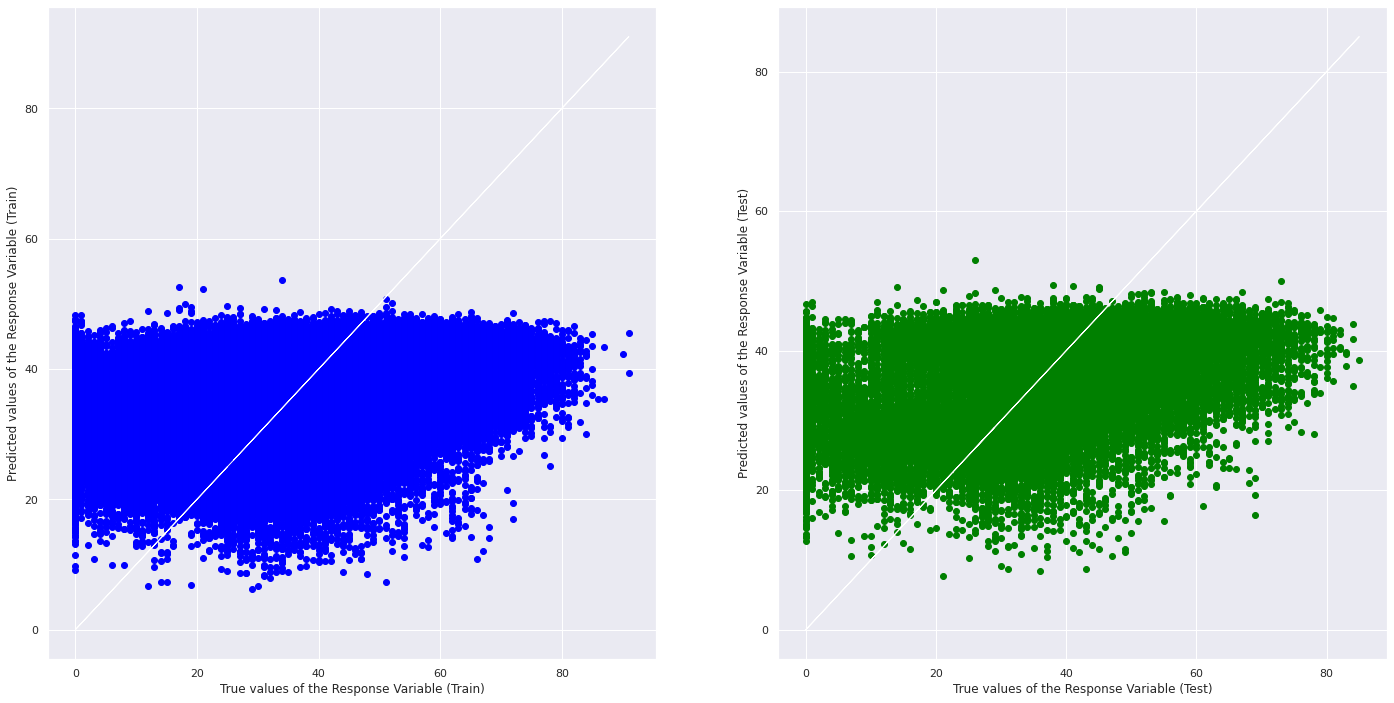

In [ ]:
# Predict the popularity scores from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1553100974854641
Mean Squared Error (MSE) 	: 247.66505963475694

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15900377210168537
Mean Squared Error (MSE) 	: 245.44586858888295



The explained variance seems quite low. Let us see if using all the variables to predict popularity would yield better results

In [ ]:
# Extract response and predictors
y = pd.DataFrame(songsDF["popularity"])
X = pd.DataFrame(songsDF[["acousticness", "energy", "loudness", "danceability", "duration_ms", 
"instrumentalness", "liveness", "speechiness", "tempo", "valence"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19606453191681095
Mean Squared Error (MSE) 	: 235.36850072300106

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1964079149977963
Mean Squared Error (MSE) 	: 235.91553237503214



Although now the explained variance is now higher, and MSE is lower, the model is still not very good. Perhaps a continous popularity score from 0 to 100 is too difficult for a model to predict. Classification could be a better option to allow more space for a model to manoeuvre.

### Predicting Popularity by Classifying Popularity Scores and using K-nearest Neighbours

We first evenly split the dataset into 5 classes by popularity score. Hence, each song now has a discrete popularity score out of 5 "stars", similar to movie reviews.

In [ ]:
classified_songsDF = songsDF
pd.cut(classified_songsDF['popularity'], bins=5, labels = [1, 2, 3, 4, 5]).value_counts()

3    64908
2    57890
1    28377
4    22840
5     1503
Name: popularity, dtype: int64

Since the bins are not equally sized, RandomOverSampler can be used to resize the unevenly distributed classes. This ensures that the data that will be fed into the classification model is balanced. 

In [ ]:
#  replace popularity score with popularity class
classified_songsDF['popularity'] = pd.cut(classified_songsDF.popularity, bins = 5, labels = [1, 2, 3, 4, 5])
classified_songsDF

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,1,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,1,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,1,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,1,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,Soul,John Legend,Quickly (feat. Brandy),3,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,2gGqKJWfWbToha2YmDxnnj,Soul,Belly,P.O.P.,3,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,2iZf3EUedz9MPqbAvXdpdA,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,1qWZdkBl4UVPj9lK6HuuFM,Soul,Jr Thomas & The Volcanos,Burning Fire,3,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


In [ ]:
X = classified_songsDF.drop(columns='popularity')[["acousticness", "energy", "loudness"]]
y = classified_songsDF.popularity

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

y_ros.value_counts()

1    64908
2    64908
3    64908
4    64908
5    64908
Name: popularity, dtype: int64

In [ ]:
X_ros.value_counts()

acousticness  energy  loudness
0.45900       0.673   -6.416      66
0.00402       0.733   -5.337      66
0.13000       0.871   -2.672      64
0.29200       0.651   -8.267      64
0.00041       0.897   -3.678      64
                                  ..
0.13600       0.534   -7.345       1
              0.541   -5.960       1
              0.542   -9.168       1
              0.544   -9.754       1
0.29100       0.359   -10.672      1
Length: 174783, dtype: int64

In [ ]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
knn.score(X_test,y_test)

0.7222068158008258

The accuracy score obtained for a number of neighbours = 1 seems to be very high, which might not be a good thing as it could be a case of overfitting. The optimal n_neighbours can be found using GridSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.3635868153313944

This is still a good prediction accuracy, far more promising than using a linear regression model with an R^2 of only 0.2. We will use this knn model with n_neighbours value of 23, on a new dataset to pick out criminally underrated songs!

In [ ]:
# new dataset
new = pd.read_csv('Dataset/tracks.csv')
predictDF = pd.DataFrame(data = new.drop_duplicates(subset=["id"], inplace=False))
predictDF

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [ ]:
#  cut predictDF, classify popularity

predictDF['popularity'] = pd.cut(predictDF.popularity, bins = 5, labels = [1, 2, 3, 4, 5])
X_pred = predictDF.drop(columns='popularity')[["acousticness", "energy", "loudness"]]
y_pred = predictDF.popularity

In [ ]:
# apply optimal knn model

knn_pred = KNeighborsClassifier(n_neighbors=23)
knn_pred.fit(X_pred, y_pred)
y_res = knn_pred.predict(X_pred)


In [ ]:
# recreate DF
resDF = pd.DataFrame(y_res, columns=["predicted_popularity"])
originalDF = pd.merge(X_pred, predictDF, left_index=True, right_index=True)
originalDF.reset_index(inplace=True, drop=True)
resDF.reset_index(inplace=True, drop=True)

finalDF = pd.concat([originalDF,resDF], axis=1)
finalDF = finalDF[["id", "name", "artists", "popularity", "predicted_popularity"]]
finalDF = finalDF.astype({'popularity':'int64'})
finalDF

,id,name,artists,popularity,predicted_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,['Uli'],1,1
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],1,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],1,1
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,['Ignacio Corsini'],1,1
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,['Dick Haymes'],1,1
...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,['阿YueYue'],3,1
586668,0NuWgxEp51CutD2pJoF4OM,blind,['ROLE MODEL'],4,2
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,['FINNEAS'],4,1
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,"['Gentle Bones', 'Clara Benin']",3,3


In [ ]:
underrated = finalDF[(finalDF["predicted_popularity"] > 3) & ((finalDF["popularity"] < finalDF["predicted_popularity"]))]
underrated['difference'] = underrated['predicted_popularity'] - underrated['popularity']
underrated.sort_values(by=['difference'], ascending=False, inplace=True)
underrated

,id,name,artists,popularity,predicted_popularity,difference
476567,6fTjKFGiFC6qQjCksq4Ld7,Vida Truncada,['Los Rancheros de Río Grande'],1,4,3
191766,0IpxUY5MFOXzk4Y7swcavv,Si Pienso en Nuestras Canciones,['Sonia Silvestre'],1,4,3
215667,67cknyLO5w4N4ai3HnI0eu,Por Eso Estoy Aquí,['Binomio de Oro'],1,4,3
212655,7phPNO9Eh35SkicrvsJRbq,Balada Triste / Ontem e Hoje,['Orquestra Românticos de Cuba'],1,4,3
211547,1rqNmcoL7dt7jdRYyatIeR,The Middle,"['Zedd', 'Maren Morris', 'Grey']",1,4,3
...,...,...,...,...,...,...
443291,3XFbNJLRobuQAwwdzkPOHI,Love You More,['JLS'],3,4,1
437925,3BhctwMUY5Y9xmes194QTq,Quase um Casal - Ao Vivo,['Maiara & Maraisa'],3,4,1
231609,0cOboDrs3BuNLNh1sAbNEP,כשנגמרת הסופה,['Eden Hason'],3,4,1
236960,6uXR7oitl7kvlavDicsK46,Basta Ya,['Conjunto Primavera'],3,4,1


In [ ]:
# for API
tracks = underrated["id"].values.tolist()[:20]
req = {"uris": []}
for i in tracks:
    uri = "spotify:track:" + i
    req["uris"].append(uri)

req

{'uris': ['spotify:track:6fTjKFGiFC6qQjCksq4Ld7',
  'spotify:track:0IpxUY5MFOXzk4Y7swcavv',
  'spotify:track:67cknyLO5w4N4ai3HnI0eu',
  'spotify:track:7phPNO9Eh35SkicrvsJRbq',
  'spotify:track:1rqNmcoL7dt7jdRYyatIeR',
  'spotify:track:2Mvjzn5KqLk9BhKU6B7eRQ',
  'spotify:track:1b6QHL6TH8lnqopc4kOzs5',
  'spotify:track:6X0OSdQsyHSo3cHU8Gc2nh',
  'spotify:track:6R0Sp2GBKzi3nT5grqMMjs',
  'spotify:track:0lfyybhBej4qWOuVVRcYfZ',
  'spotify:track:0pJCzGFc4HTNmnaAjECiku',
  'spotify:track:3Ie5yhADT62SAMRSjmSnf5',
  'spotify:track:1XlIPOIjnc1zik4NU0np1M',
  'spotify:track:2YNz2Xa7WyVhQsL2zvs1nQ',
  'spotify:track:5TYK5EnVW8A8d5uwmkmdTf',
  'spotify:track:1vwjVYaFCJicmph7KABc4Z',
  'spotify:track:3fXphvrjNHi0eHUG4oSHe1',
  'spotify:track:70qezSAWRGCOnTe089a5Gk',
  'spotify:track:1OtCGmcuCFuAOpnfYz1iBP',
  'spotify:track:6kFab3Gb3I3gzqsPVBNE9e']}

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4c1974f-2461-4ca8-aecf-ce1d02f67451' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>